<a href="https://colab.research.google.com/github/Hyunsooooo/Pytorch-/blob/main/%EC%B5%9C%EC%A0%81%ED%99%94_%EA%B8%B0%EB%B2%95_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SGD Stochastic Grdient Descent (확률적 경사 하강법)

GD의 경우 한번 학습할 때마다 모든 데이터에 대해 가중치를 조절하므로 계산량이 많다. 이를 보완하기 위해 랜덤하게 추출한 일부 데이터에 대해 가중치를 조절하는 방법이다.

지금 서 있는 장소에서 가장 크게 기울어진 방향으로 가는 것


$ W(t+1) = W(t) - lr*{\partial L\over\partial W} $

W = 매개변수
L = 손실 함수


In [ ]:
class SGD:
  def __init__(self, lr=0.01): # lr = 0.01로 설정
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr*grads[key] # 매개변수 갱신

* 단점 : 단순하고 계산량이 적지만, 정확도가 낮고 일부 문제에서 비효율적이다.

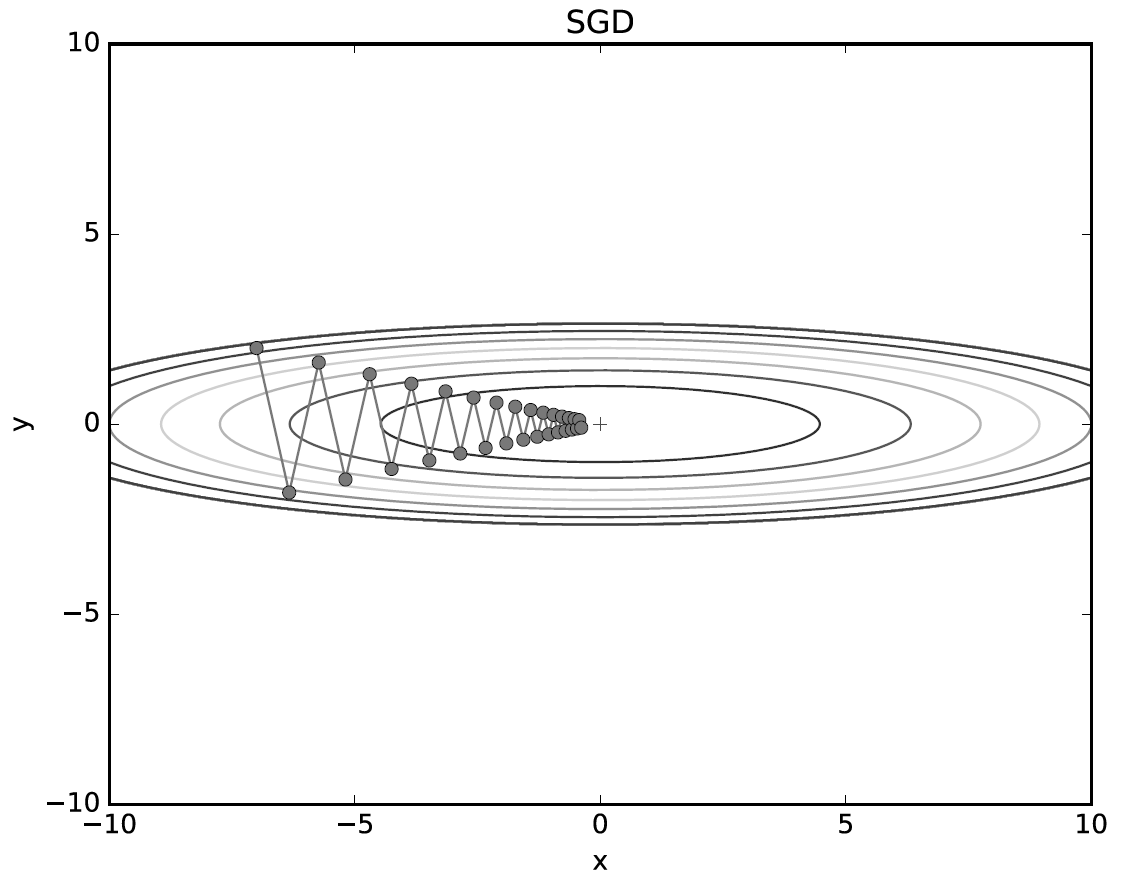

# Momentum (모멘텀)

모멘텀은 관성,탄력, 가속도라는 의미로 모멘텀 SGD 는 경사 하강법에 관성을 더해주는 것

경사 하강법과 같이 매번 기울기를 계산하는데, 여기서 이전의 수정방향을 참고하여 일정한 비율만 수정되게 하는 방법

SGD의 지그재그 현상이 줄어들고, 이전의 방향을 고려하므로 관성의 효과를 낼 수 있다.

$ V(t) = {m*V(t-1)} - {\alpha*{\partial L\over\partial W}}$

$ W(t+1) = W(t) + V(t) $

W = 매개변수

L = 손실 함수

$\alpha$ = 모멘텀 계수 (보통 0.9로 설정)

In [ ]:
class Momentum:
  def __init__(self, lr=0.01, momentum = 0.9):
    self.lr = lr
    self.momentum = momentum
    self.v = None

  def update(self, params, grads):
    if self.v is None:
      self.v = {}
      for key, val in params.items():
        self.v[key] = np.zeros_like(val)
      
    for key in params.keys():
      self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
      params[key] += self.v[key]

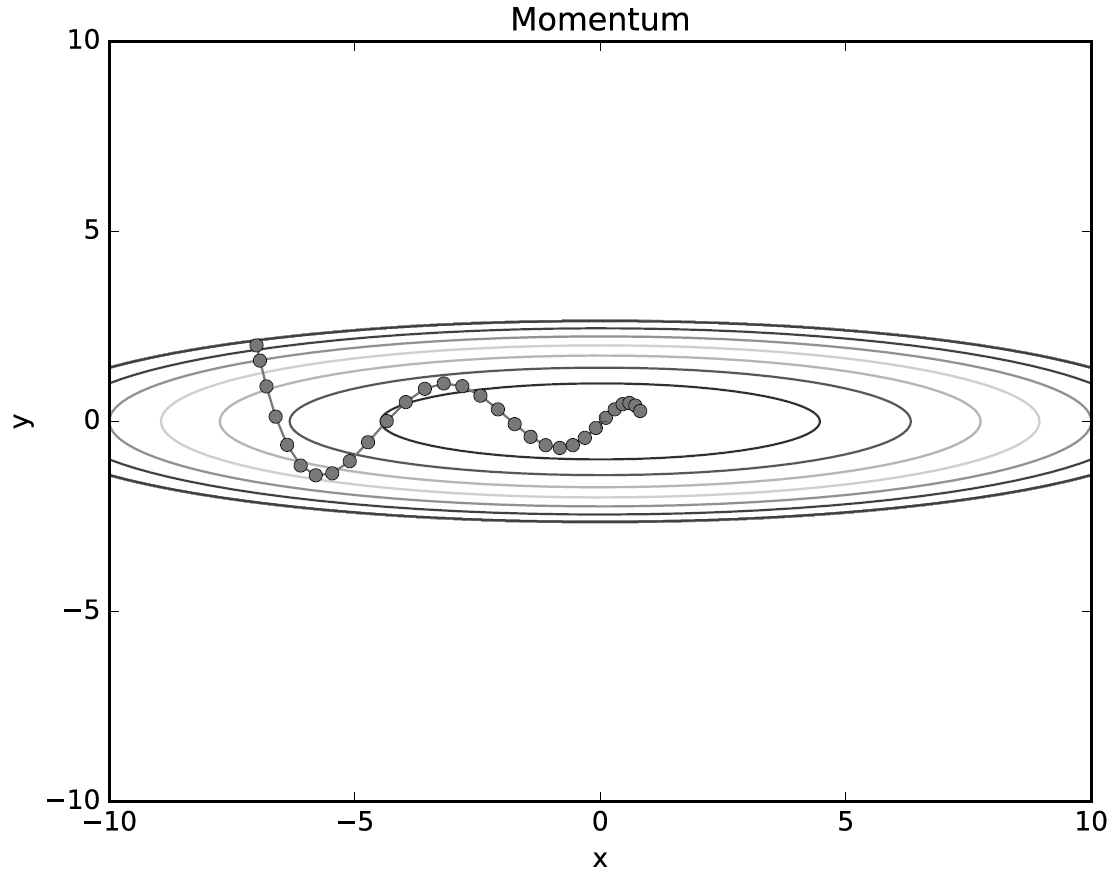

# AdaGrad

최적화에서 학습률을 조정하는 것은 중요하다. 너무 작으면 학습이 오래 걸리고, 너무 크면 값이 발산하여 학습이 제대로 이루어지지 않는다.

이 학습률을 정하는 효과적 기술로 학습률 감소 라는 것이 있는데, 학습을 진행하면서 학습률을 점차 줄여가는 방법이다.

AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다.

$ h(t) = h(t-1) + ({\partial L \over \partial W})^2 $

$ W(t+1) = W(t) - lr*{1\over\sqrt h}*{\partial L \over \partial W}$

In [ ]:
class AdaGrad:
  def __init__ (self, lr= 0.01):
    self.lr = lr
    self.h = None

  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key, val in params.items():
        self.h[key] = np.zeros_like(val)
    
    for key in params.keys():
      self.h[key] += gards[key]*grads[key]
      params[key] -= self.lr *grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 0으로 나누는 일이 없도록

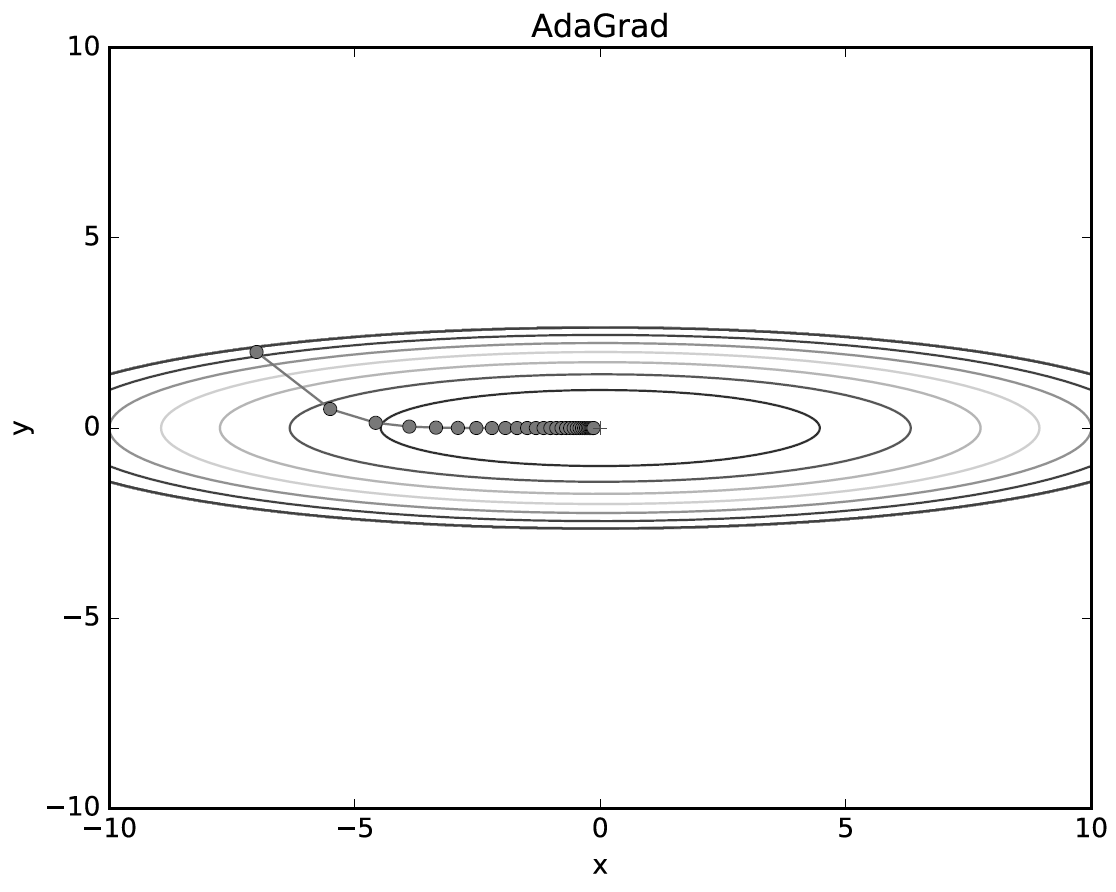

# Adam

Momentum과 AdaGrad를 융합한 방법이다.

$ M(t) = \beta_1M(t-1) + (1-\beta_1){\partial L\over \partial W} $

$ V(t) = \beta_2V(t-1) + (1-\beta_2)({\partial L\over \partial W})^2 $

$ \hat{M}(t) = {M(t) \over {1-\beta_1^t}}$

$ \hat{V}(t) = {V(t) \over {1-\beta_2^t}}$

$ W(t+1) = W(t) - \alpha *{ \hat{M}(t) \over \sqrt{\hat{V}(t) + \epsilon}} $

$\alpha = 0.001, \beta_1 = 0.9, \beta_2 = 0.999 , \epsilon = 10^{-8}$ 이 가장 Default 값으로 알려져있음


In [ ]:
class Adam:
  def __init__(self, lr = 0.001, beta1 = 0.9, beta2= 0.999):
    self.lr = lr
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None

  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key, val in params.items():
        self.m[key] = np.zeros_like(val)
        self.v[key] = np.zeros_like(val)

    self.iter +=1
    lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)

    for key in params.keys():
      self.m[key] +=(1 - self.beta1) * (grads[key] - self.m[key])
      self.v[key] +=(1 - self.beta2) * (gards[key]**2 - self.v[key])

      params[key] -= lr_t*self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

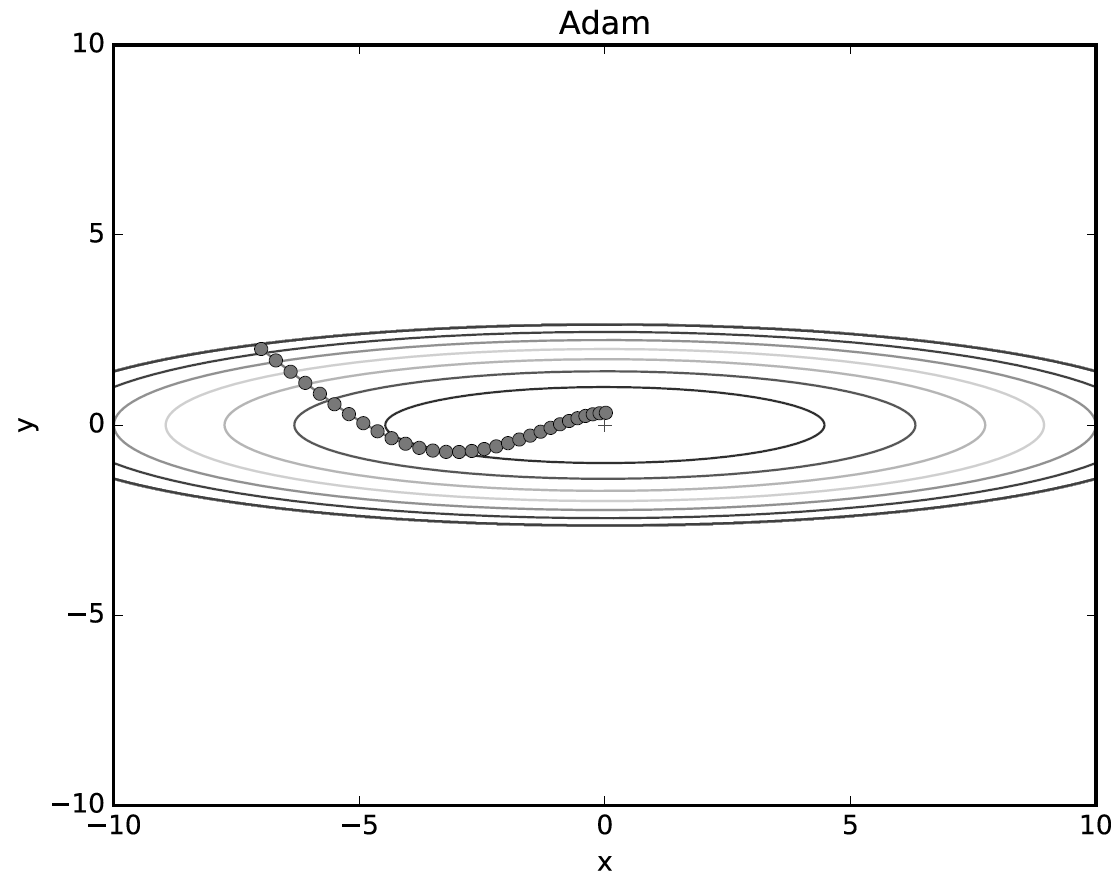